In [2]:
import gzip
import json
# import csv
import pandas as pd
import numpy as np
# import re
import pyarrow as pa
import pyarrow.parquet as pq
from pandas import json_normalize
import ast
import matplotlib.pyplot as plt
import seaborn as sns

import my_functions
%load_ext autoreload
%autoreload 2

In [3]:
# Configurar la visualización
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')
pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_columns')


# ETL

## df_user

In [4]:
# Cargar el archivo en un DataFrame
df_user = pd.read_parquet('Datasets/user-001.parquet')

In [5]:
df_user_bu1 = df_user

In [6]:
my_functions.describir_df(df_user)

Cantidad Registros:  2105597
Cantidad Campos:  22
Campos:
 Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')


,Campo,Tipo de Dato,Valores Nulos,% Nulos,Valores No Nulos,% No Nulos,Valores Únicos,% Únicos
0,user_id,[<class 'str'>],0,0.0,2105597,100.0,1987897,94.41
1,name,[<class 'str'>],0,0.0,2105597,100.0,132361,6.29
2,review_count,[<class 'int'>],0,0.0,2105597,100.0,1973,0.09
3,yelping_since,[<class 'str'>],0,0.0,2105597,100.0,1980183,94.04
4,useful,[<class 'int'>],0,0.0,2105597,100.0,5349,0.25
5,funny,[<class 'int'>],0,0.0,2105597,100.0,3757,0.18
6,cool,[<class 'int'>],0,0.0,2105597,100.0,4532,0.22
7,elite,[<class 'str'>],0,0.0,2105597,100.0,1356,0.06
8,friends,[<class 'str'>],0,0.0,2105597,100.0,1091999,51.86
9,fans,[<class 'int'>],0,0.0,2105597,100.0,691,0.03


In [7]:
my_functions.registros_al_azar(df_user, 5)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
1325810,vCTdTrjYFBydO1_w_T6hdQ,Mike,16,2015-09-16 23:06:43,13,1,6,,None,0,2.00,0,0,0,0,0,0,0,0,0,1,0
1222109,lNH5NkfFl6Lg6137GzqJ_Q,Am,48,2011-04-23 00:25:43,49,12,26,,"E8H8KHzMWfxsRzn0xuy_Yg, 7nAFEaKWtWecCYDsBaiw0Q...",1,4.30,0,0,0,0,0,1,1,0,0,0,0
779328,smu18dg8ADbi5u6kv-0IpA,Emily,8,2012-11-19 20:46:36,4,1,1,,None,0,3.56,0,0,0,0,0,0,0,0,0,1,0
1264654,WqpWKpdlXDvFm8Tv_WFcFQ,M,1,2015-02-14 22:22:29,0,0,0,,HTBysH8LRswV9BdoaSwBfA,0,5.00,0,0,0,0,0,0,0,0,0,0,0
1712520,AxGZ_COjp3Qg62UQuL_4Gw,Bill,25,2014-05-28 19:28:27,15,1,2,,None,0,4.24,0,0,0,0,0,0,0,0,0,0,0


### Valores Nulos

In [8]:
# Aplicar strip a todas las columnas del DataFrame
df_user = df_user.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\matia\AppData\Local\Temp\ipykernel_9448\957674450.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_user = df_user.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [9]:
# Contar valores nulos por columna
nulos_por_columna = df_user.isnull().sum()

# Mostrar los resultados
print("Valores nulos por columna:")
print(nulos_por_columna)


Valores nulos por columna:
user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64


In [10]:
my_functions.buscar_valor(df_user, valores="None")

Cantidad de registros con 'None': 878564

Total de apariciones en el dataframe:
{('name', 'None'): 33, ('friends', 'None'): 878551}



In [11]:
my_functions.buscar_valor(df_user, valores="")

Cantidad de registros con '': 1988836

Total de apariciones en el dataframe:
{('elite', ''): 1988836}



In [12]:
my_functions.buscar_valor(df_user, valores="Nan")

Cantidad de registros con 'Nan': 213

Total de apariciones en el dataframe:
{('name', 'Nan'): 213}



In [13]:
my_functions.imputar_valores(df_user, valores_a_reemplazar = ["Nan", "None", ""], valor_a_imputar = None)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,3.91,250,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,1145,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,3.32,89,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,4.27,24,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,None,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,3.54,1,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105592,4QGxxakRZeOlg_qDuxmTeQ,Jennilee,38,2012-01-19 23:33:02,74,9,6,None,kmwNG5LZSHFmveg6wYYdrw,0,2.98,0,1,0,0,0,1,4,0,0,1,0
2105593,tmelBbVBGAzXBVfH2u_R6g,Gerry,19,2009-06-09 16:34:54,14,5,2,None,"BFYdCAMFyjYHDwesndEXEg, _9fTIqfSJc7g3V_o76XRVg...",1,3.68,0,1,0,0,0,0,1,0,0,0,0
2105594,tpBznnD6uJN3m_pJubj09w,Emily,26,2013-08-13 23:18:11,4,1,2,None,"bKV3ly2MuK-K1cptMrFknQ, liel18zRoSB4tEkUP7i6Cg...",0,3.85,0,0,0,0,0,1,0,0,0,0,0
2105595,Kst_srPw7GdYydMFYdCtzw,Heatheranne,25,2015-01-10 00:06:25,21,2,5,None,"dzHTk52vbGtbktRm_B-wEg, fOfFLV7IbBDN6lzARaLqdg...",0,2.85,0,0,0,0,0,0,1,0,0,0,0


In [14]:
my_functions.describir_df(df_user)

Cantidad Registros:  2105597
Cantidad Campos:  22
Campos:
 Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')


,Campo,Tipo de Dato,Valores Nulos,% Nulos,Valores No Nulos,% No Nulos,Valores Únicos,% Únicos
0,user_id,[<class 'str'>],0,0.00,2105597,100.00,1987897,94.41
1,name,"[<class 'str'>, <class 'NoneType'>]",246,0.01,2105351,99.99,132198,6.28
2,review_count,[<class 'int'>],0,0.00,2105597,100.00,1973,0.09
3,yelping_since,[<class 'str'>],0,0.00,2105597,100.00,1980183,94.04
4,useful,[<class 'int'>],0,0.00,2105597,100.00,5349,0.25
5,funny,[<class 'int'>],0,0.00,2105597,100.00,3757,0.18
6,cool,[<class 'int'>],0,0.00,2105597,100.00,4532,0.22
7,elite,"[<class 'str'>, <class 'NoneType'>]",1988836,94.45,116761,5.55,1355,0.06
8,friends,"[<class 'str'>, <class 'NoneType'>]",878551,41.72,1227046,58.28,1091998,51.86
9,fans,[<class 'int'>],0,0.00,2105597,100.00,691,0.03


### Registros duplicados

In [15]:
df_duplicados = my_functions.duplicados(df_user)
df_duplicados.head(5)

Cantidad de registros duplicados:  161000


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
27105,---2PmXbF47D870stH1jqA,Susan,36,2012-10-24 13:20:46,63,4,36,None,"o9QkuHIyxmqbORF7PeAbuw, Q70zvjAa9aawgW7KsNVGDA...",3,4.98,0,0,0,0,0,0,2,0,0,2,0
2017202,---2PmXbF47D870stH1jqA,Susan,36,2012-10-24 13:20:46,63,4,36,None,"o9QkuHIyxmqbORF7PeAbuw, Q70zvjAa9aawgW7KsNVGDA...",3,4.98,0,0,0,0,0,0,2,0,0,2,0
2038302,---2PmXbF47D870stH1jqA,Susan,36,2012-10-24 13:20:46,63,4,36,None,"o9QkuHIyxmqbORF7PeAbuw, Q70zvjAa9aawgW7KsNVGDA...",3,4.98,0,0,0,0,0,0,2,0,0,2,0
2059402,---2PmXbF47D870stH1jqA,Susan,36,2012-10-24 13:20:46,63,4,36,None,"o9QkuHIyxmqbORF7PeAbuw, Q70zvjAa9aawgW7KsNVGDA...",3,4.98,0,0,0,0,0,0,2,0,0,2,0
2080502,---2PmXbF47D870stH1jqA,Susan,36,2012-10-24 13:20:46,63,4,36,None,"o9QkuHIyxmqbORF7PeAbuw, Q70zvjAa9aawgW7KsNVGDA...",3,4.98,0,0,0,0,0,0,2,0,0,2,0


In [16]:
df_user = df_user.drop_duplicates()

In [17]:
print("Cantidad de registros: ", len(df_user))

Cantidad de registros:  1987897


In [18]:
df_user_bu2 = df_user

### Campo 'yelping_since'

In [19]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 348.8+ MB


In [20]:
# Aplicar la función a la columna 'yelping_since' y crear la columna 'user_year'
df_user['user_year'] = df_user['yelping_since'].apply(my_functions.extraer_año)

C:\Users\matia\AppData\Local\Temp\ipykernel_9448\696338726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user['user_year'] = df_user['yelping_since'].apply(my_functions.extraer_año)


In [21]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987897 entries, 0 to 1987896
Data columns (total 23 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
 22  user_year           int64  
dtypes: float64(1), int64(17), object(5)
memory usage: 364.0+ MB


In [22]:
my_functions.describir_df(df_user, campos_incluir=['user_year'])

Cantidad Registros:  1987897
Cantidad Campos:  1
Campos:
 Index(['user_year'], dtype='object')


,Campo,Tipo de Dato,Valores Nulos,% Nulos,Valores No Nulos,% No Nulos,Valores Únicos,% Únicos
0,user_year,[<class 'int'>],0,0.0,1987897,100.0,19,0.0


In [23]:
my_functions.valores_unicos(df_user, ['user_year'])

{'user_year': array([2007, 2009, 2008, 2005, 2010, 2011, 2006, 2012, 2013, 2004, 2014,
        2018, 2016, 2017, 2015, 2019, 2020, 2021, 2022], dtype=int64)}

In [24]:
df_user.head(1)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,user_year
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,3.91,250,65,55,56,18,232,844,467,467,239,180,2007


### Outliers

In [25]:
df_user.describe().round(2)

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,user_year
count,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00,1987897.00
mean,23.39,42.30,16.97,23.79,1.47,3.63,1.81,0.29,0.18,0.13,0.06,1.44,3.01,2.83,2.83,1.06,1.23,2014.27
std,82.57,641.48,407.80,565.35,18.13,1.18,73.60,12.82,15.16,11.36,10.04,60.17,119.39,96.66,96.66,32.18,95.16,3.11
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2004.00
25%,2.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2012.00
50%,5.00,3.00,0.00,0.00,0.00,3.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2014.00
75%,17.00,13.00,2.00,3.00,0.00,4.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2016.00
max,17473.00,206296.00,185823.00,199878.00,12497.00,5.00,25784.00,13501.00,14180.00,13654.00,12669.00,59031.00,101097.00,49967.00,49967.00,15934.00,82630.00,2022.00


## EDA df_user

In [ ]:
my_functions.describir_df(df_user)

Cantidad Registros:  1987897
Cantidad Campos:  23
Campos:
 Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos', 'user_year'],
      dtype='object')


,Campo,Tipo de Dato,Valores Nulos,% Nulos,Valores No Nulos,% No Nulos,Valores Únicos,% Únicos
0,user_id,[<class 'str'>],0,0.00,1987897,100.00,1987897,100.00
1,name,"[<class 'str'>, <class 'NoneType'>]",225,0.01,1987672,99.99,132198,6.65
2,review_count,[<class 'int'>],0,0.00,1987897,100.00,1973,0.10
3,yelping_since,[<class 'str'>],0,0.00,1987897,100.00,1980183,99.61
4,useful,[<class 'int'>],0,0.00,1987897,100.00,5349,0.27
5,funny,[<class 'int'>],0,0.00,1987897,100.00,3757,0.19
6,cool,[<class 'int'>],0,0.00,1987897,100.00,4532,0.23
7,elite,"[<class 'str'>, <class 'NoneType'>]",1896699,95.41,91198,4.59,1355,0.07
8,friends,"[<class 'str'>, <class 'NoneType'>]",878551,44.19,1109346,55.81,1091998,54.93
9,fans,[<class 'int'>],0,0.00,1987897,100.00,691,0.03


In [27]:
my_functions.registros_al_azar(df_user, 5)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,user_year
1955030,6qwN5Nk19MV8aC-dP-wcMQ,Ken,1,2012-05-22 20:34:52,0,0,0,None,None,0,5.00,0,0,0,0,0,0,0,0,0,0,0,2012
566395,P5D66vr7CvKw6w9j_heJ6g,Diane,31,2014-04-19 18:49:26,11,1,0,None,None,0,3.33,0,0,0,0,0,0,0,0,0,1,0,2014
1060405,ScTHeHUjgqPhekuK_3plog,Kevin,1,2016-12-01 04:25:21,0,0,0,None,"TMlQ8nTB01au2bJjXEEAHQ, fEzlfJKjACJ0R_iqkvAQ8w...",0,1.00,0,0,0,0,0,0,0,0,0,0,0,2016
1173199,P0nblBGkcyBIGbaKiR2FqQ,Ian,8,2017-09-13 20:21:16,9,3,0,None,None,0,1.88,0,0,0,0,0,0,0,0,0,0,0,2017
94481,CcwX217E02qQdDK0gIFj-A,Lyndsay,7,2016-01-13 18:34:38,2,0,0,None,"-W6bYoSrnGk8Wo6iadnnxA, xlFydF7SN3Ctc_a7YBI80Q...",0,5.00,0,0,0,0,0,0,0,0,0,0,0,2016


### Campo 'review_count'

In [ ]:
df_user['review_count'].describe()

count    1.987897e+06
mean     2.339441e+01
std      8.256699e+01
min      0.000000e+00
25%      2.000000e+00
50%      5.000000e+00
75%      1.700000e+01
max      1.747300e+04
Name: review_count, dtype: float64

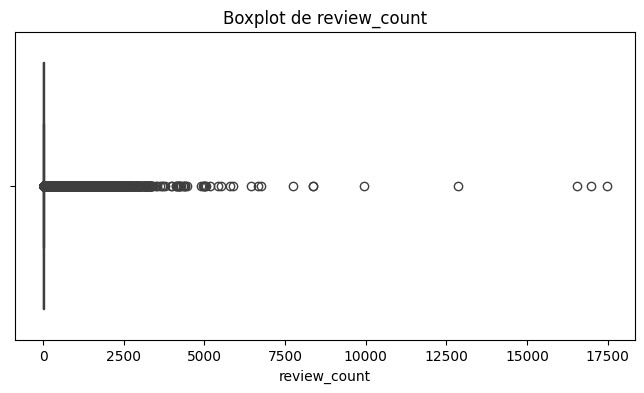

In [ ]:
# Crear el boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_user['review_count'])
plt.title('Boxplot de review_count')
plt.xlabel('review_count')
plt.show()


In [ ]:
df_user['review_count'].mode().iloc[0]

1

In [ ]:
df_user['review_count'].mean()

23.394409267683386

### Campo 'elite'

In [ ]:
df_user['elite'] = df_user['elite'].str.strip()


C:\Users\matia\AppData\Local\Temp\ipykernel_9448\3978575793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user['elite'] = df_user['elite'].str.strip()


In [ ]:
my_functions.describir_df(df_user, campos_incluir=['elite'])

Cantidad Registros:  1987897
Cantidad Campos:  1
Campos:
 Index(['elite'], dtype='object')


,Campo,Tipo de Dato,Valores Nulos,% Nulos,Valores No Nulos,% No Nulos,Valores Únicos,% Únicos
0,elite,"[<class 'str'>, <class 'NoneType'>]",1896699,95.41,91198,4.59,1355,0.07


## ETL reviews

In [28]:
# Ruta al dataset 
ruta_items = 'Datasets/review-002.json'

# Se lee de cada línea del dataset
filas_items = []
with open(ruta_items, encoding='latin-1') as f:
    for line in f.readlines():
        filas_items.append(ast.literal_eval(line))

# Se convierte en dataframe
df_reviews = pd.DataFrame(filas_items)

In [29]:
df_reviews.head(3)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30


In [32]:
my_functions.describir_df(df_reviews)

Cantidad Registros:  6990280
Cantidad Campos:  9
Campos:
 Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')


,Campo,Tipo de Dato,Valores Nulos,% Nulos,Valores No Nulos,% No Nulos,Valores Únicos,% Únicos
0,review_id,[<class 'str'>],0,0.0,6990280,100.0,6990280,100.00
1,user_id,[<class 'str'>],0,0.0,6990280,100.0,1987929,28.44
2,business_id,[<class 'str'>],0,0.0,6990280,100.0,150346,2.15
3,stars,[<class 'float'>],0,0.0,6990280,100.0,5,0.00
4,useful,[<class 'int'>],0,0.0,6990280,100.0,259,0.00
5,funny,[<class 'int'>],0,0.0,6990280,100.0,201,0.00
6,cool,[<class 'int'>],0,0.0,6990280,100.0,210,0.00
7,text,[<class 'str'>],0,0.0,6990280,100.0,6974127,99.77
8,date,[<class 'str'>],0,0.0,6990280,100.0,6885665,98.50


### Valores Nulos

In [46]:
# Aplicar strip a todas las columnas del DataFrame
df_reviews = df_reviews.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\matia\AppData\Local\Temp\ipykernel_9448\3580715683.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_reviews = df_reviews.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [47]:
# Contar valores nulos por columna
nulos_por_columna = df_reviews.isnull().sum()

# Mostrar los resultados
print("Valores nulos por columna:")
print(nulos_por_columna)

Valores nulos por columna:
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64


In [48]:
my_functions.buscar_valor(df_reviews, valores="None")
my_functions.buscar_valor(df_reviews, valores="")
my_functions.buscar_valor(df_reviews, valores="Nan")

Cantidad de registros con 'None': 0

Total de apariciones en el dataframe:
{}

Cantidad de registros con '': 0

Total de apariciones en el dataframe:
{}

Cantidad de registros con 'Nan': 0

Total de apariciones en el dataframe:
{}



### Registros duplicados

In [33]:
df_duplicados = my_functions.duplicados(df_reviews, campos_excluir = 'review_id')
len(df_duplicados)

Cantidad de registros duplicados:  13


13

In [34]:
df_duplicados.head(13)

,user_id,business_id,stars,useful,funny,cool,text,date
2661984,3B5wkOgsrjBjXRpGdrmTSA,n3Q7DXPyBzGjPK1l09SomQ,4.0,0,0,0,"Fox Rehab at-home in Virgina-Northern, Fairfax...",2021-02-01 17:04:06
2774499,3B5wkOgsrjBjXRpGdrmTSA,n3Q7DXPyBzGjPK1l09SomQ,4.0,0,0,0,"Fox Rehab at-home in Virgina-Northern, Fairfax...",2021-02-01 17:04:06
495992,FHIZVv4yXhSAULPkxqsHxQ,zwXT4m9svdg-xh2cKjEp-Q,2.0,0,0,0,Food was good but service was bad!!!! The mana...,2015-04-10 16:05:49
645298,FHIZVv4yXhSAULPkxqsHxQ,zwXT4m9svdg-xh2cKjEp-Q,2.0,0,0,0,Food was good but service was bad!!!! The mana...,2015-04-10 16:05:49
688326,FHIZVv4yXhSAULPkxqsHxQ,zwXT4m9svdg-xh2cKjEp-Q,2.0,0,0,0,Food was good but service was bad!!!! The mana...,2015-04-10 16:05:49
6369843,HQbMlz5dUFb5CMKAT6p3qg,DB8YfpBxsPlxDcNhfTKOWA,5.0,0,0,0,Hi! So I googled a center city nailery that cl...,2015-05-08 21:20:09
6531617,HQbMlz5dUFb5CMKAT6p3qg,DB8YfpBxsPlxDcNhfTKOWA,5.0,0,0,0,Hi! So I googled a center city nailery that cl...,2015-05-08 21:20:09
3113588,T870ZkavUI1rqaO_FrJFiw,mfTyBrvx9uCTSPjmrl8PjA,5.0,0,0,0,Great hotel in the middle of the French quarte...,2008-08-27 09:49:33
3116545,T870ZkavUI1rqaO_FrJFiw,mfTyBrvx9uCTSPjmrl8PjA,5.0,0,0,0,Great hotel in the middle of the French quarte...,2008-08-27 09:49:33
2736490,wAph_egpAXr9ic-A2vnINQ,fiGh8ctcvIRm4Ii2GOtoHQ,2.0,0,0,0,"We have been to Trax several times before, wit...",2018-07-23 21:43:33


In [35]:
df_reviews = df_reviews.drop_duplicates(keep='first')

In [36]:
my_functions.duplicados(df_reviews)

Cantidad de registros duplicados:  0


,review_id,user_id,business_id,stars,useful,funny,cool,text,date


### Campo 'date'

In [49]:
df_reviews['date'][10]

'2015-06-21 14:48:06'

In [50]:
# Convertir la columna 'date' a datetime
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

# Extraer la información de la fecha en una nueva columna 'review_date'
df_reviews['review_date'] = df_reviews['date'].dt.date

In [51]:
df_reviews['review_date'][10]

datetime.date(2015, 6, 21)

In [52]:
df_reviews.head(1)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,review_date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,2018-07-07


In [57]:
# Muestra la fecha mínima y máxima en la columna 'review_date'
fecha_minima = df_reviews['review_date'].min()
fecha_maxima = df_reviews['review_date'].max()

print("Fecha mínima en 'review_date':", fecha_minima)
print("Fecha máxima en 'review_date':", fecha_maxima)

Fecha mínima en 'review_date': 2005-02-16
Fecha máxima en 'review_date': 2022-01-19


## EDA df_reviews

In [45]:
my_functions.describir_df(df_reviews)

Cantidad Registros:  6990280
Cantidad Campos:  9
Campos:
 Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')


,Campo,Tipo de Dato,Valores Nulos,% Nulos,Valores No Nulos,% No Nulos,Valores Únicos,% Únicos
0,review_id,[<class 'str'>],0,0.0,6990280,100.0,6990280,100.00
1,user_id,[<class 'str'>],0,0.0,6990280,100.0,1987929,28.44
2,business_id,[<class 'str'>],0,0.0,6990280,100.0,150346,2.15
3,stars,[<class 'float'>],0,0.0,6990280,100.0,5,0.00
4,useful,[<class 'int'>],0,0.0,6990280,100.0,259,0.00
5,funny,[<class 'int'>],0,0.0,6990280,100.0,201,0.00
6,cool,[<class 'int'>],0,0.0,6990280,100.0,210,0.00
7,text,[<class 'str'>],0,0.0,6990280,100.0,6974127,99.77
8,date,[<class 'str'>],0,0.0,6990280,100.0,6885665,98.50


In [60]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 10 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        float64       
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
 9   review_date  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 533.3+ MB


# Guardado de datos

In [58]:
# Exportar a formato Parquet
df_user.to_parquet('Datasets/df_user.parquet', index=False)

In [59]:
# Exportar a formato Parquet
df_reviews.to_parquet('Datasets/df_reviews.parquet', index=False)

# Restaurants

In [62]:
# Cargar el archivo en un DataFrame
df_restaurants = pd.read_parquet('Datasets/df_restaurants.parquet')

In [64]:
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52268 entries, 0 to 52267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   52268 non-null  object 
 1   name          52268 non-null  object 
 2   address       52268 non-null  object 
 3   city          52268 non-null  object 
 4   state         52268 non-null  object 
 5   postal_code   52268 non-null  object 
 6   latitude      52268 non-null  float64
 7   longitude     52268 non-null  float64
 8   stars         52268 non-null  float64
 9   review_count  52268 non-null  int64  
 10  is_open       52268 non-null  int64  
 11  attributes    51703 non-null  object 
 12  categories    52268 non-null  object 
 13  hours         44990 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 5.6+ MB


In [66]:
my_functions.registros_al_azar(df_restaurants, 3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
43512,5OucQMJtsGGh8PLnjedHUQ,Filiberto's,635 E Wetmore Rd,Tucson,AB,85705,32.287027,-110.962446,3.5,6,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Fast Food, Restaurants, Mexican, Tacos","{'Friday': '6:0-2:0', 'Monday': '6:0-2:0', 'Sa..."
45409,yaQJfDao5kQ-c3AkfROhuQ,Sake Hana,839-1399 Gap Newport Pike,London Grove,PA,19311,39.837202,-75.798695,4.0,25,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Asian Fusion, Japanese, Food, Sus...","{'Friday': '11:0-22:30', 'Monday': '11:0-22:0'..."
40300,H7cS7iYLMf4MmZJiqEWs8Q,Burger King,521 W Baltimore Pike,Clifton Heights,IN,19018,39.926652,-75.306017,1.5,25,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Hot Dogs, Burgers, Fast Food, Restaurants","{'Friday': '11:0-19:0', 'Monday': '11:0-19:0',..."


# Merge Reviews / Restaurants

In [67]:
df_reviews_restaurants = pd.merge(df_reviews, df_restaurants[['business_id']], on='business_id', how='inner')

In [68]:
df_reviews_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4724471 entries, 0 to 4724470
Data columns (total 10 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        float64       
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
 9   review_date  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 360.4+ MB
